The following will use a python library, $pymcmcstat$ developed by P.R. Miles and is available at [https://github.com/prmiles/pymcmcstat]

In [90]:
import numpy as np
import matplotlib.pyplot as plt

#### define a function (model), $f$ to generate some data

$$
Q  =  a \cdot x^b
$$

Thus, the parameters $a$ & $b$ are to be estimated, assuming the data $Q$(here $y$) & $h$(here $x$)are given

In [91]:
def model(data,q):
    a, b = q
    x = data.xdata[0]
    return a * np.power(x, b)

In [92]:
# The package pymcmcstat requires the observed data and the predictand to be input as data structure shown below
from pymcmcstat.MCMC import DataStructure
data = DataStructure()
data.add_data_set(x=np.linspace(0,4,num=int(1e3)), y=None)
# qtrue = [-1, 12.0, 3.0, -40.0]
qtrue = [5, 2/3]

Text(0, 0.5, 'y')

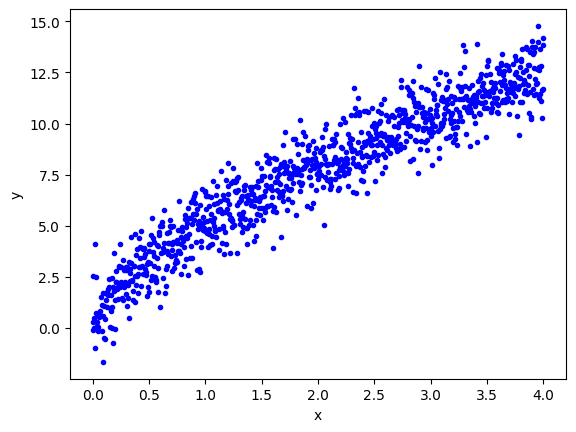

In [93]:
# Quickly plotting the data for visual interpretation
x = data.xdata[0]
sigma = 1
y = model(data, qtrue) + sigma*np.random.standard_normal(x.shape)
fig = plt.figure()
ax = fig.gca()
tmp = ax.plot(x,y,'.b')
ax.set_xlabel('x')
ax.set_ylabel('y')

#### Define the sum of squares function: **ssfun**

In [94]:
def ssfun(q, data):
    # Extract ydata
    ydata = data.ydata[0]
    # Evaluate model
    ymodel = model(data, q)
    res = ymodel.reshape(ydata.shape) - ydata
    return (res**2).sum(axis=0)

In [118]:
# Algorithm settings
from pymcmcstat.MCMC import MCMC
mcstat = MCMC()
mcstat.data.add_data_set(x,y)   # add data
mcstat.model_settings.define_model_settings(
    sos_function=ssfun)   # assign cost function
mcstat.simulation_options.define_simulation_options(
    nsimu=3e3,   # No. of MCMC simulations
    updatesigma=True) # update variance of obs errors
# Add model parameters
mcstat.parameters.add_model_parameter(        # settings for parameter 'l'
    name='a',
    theta0=50,
    minimum=0.1,
    maximum=100)   # initak guess
mcstat.parameters.add_model_parameter(       # settings for parameter 'n'
    name='b',
    theta0=50,
    minimum=0.01,
    maximum=100)   # initak guess

In [119]:
# Run the model and print put the results 
mcstat.run_simulation()
results = mcstat . simulation_results . results
print('\n\n', results['theta'],)
burnin=int(0.5*len(results['chain']))
print('\n\n',f'burnin:{burnin}')
print('\n\nMean of the chain after burn-in:', np.mean(results['chain'][burnin:, :], axis=0))
print('\n\nTrue parameters:', qtrue)


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         a:     50.00 [     0.10,    100.00] N( 0.00e+00,      inf)
         b:     50.00 [ 1.00e-02,    100.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 3000 of 3000 complete in 0.3 sec

 [4.57812903 0.66673063]


 burnin:1500


Mean of the chain after burn-in: [4.92606252 0.75509478]


True parameters: [5, 0.6666666666666666]


/tmp/ipykernel_8014/2070123298.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) plot_chain_panel. (New function:"from pymcmcstat.mcmcplot import plot_chain_panel") -- Deprecated since version 1.9.0.
  figcp = mcpl.plot_chain_panel(chain, names, figsizeinches=(7,6))


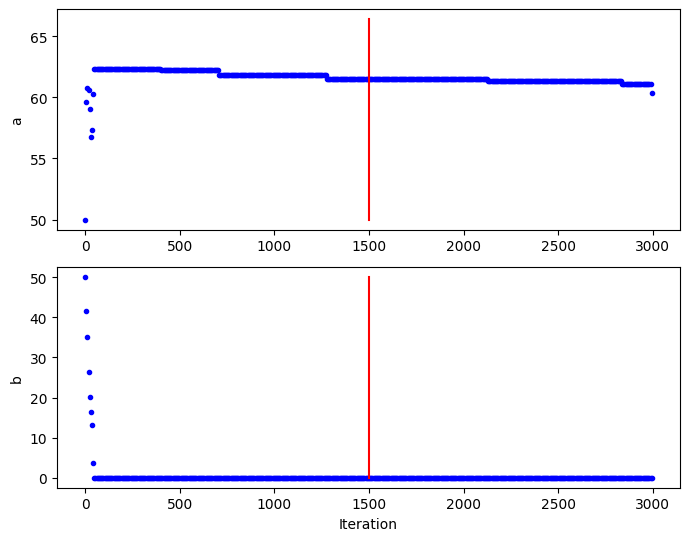

In [113]:
# Plot the chain of simulations
chain = results ['chain']
names = results ['names']
mcpl = mcstat . mcmcplot # initialize plotting method
figcp = mcpl.plot_chain_panel(chain, names, figsizeinches=(7,6))
axes = figcp.get_axes()
for ii,ax in enumerate(axes):
    ch = chain[:,ii]
    ax.plot([burnin, burnin], [ch.min(), ch.max()], 'r')

In [114]:
# mcpl . plot_pairwise_correlation_panel ( chain [burnin:,:] , names)

/tmp/ipykernel_8014/3248454739.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) plot_density_panel. (New function: "from pymcmcstat.mcmcplot import plot_density_panel") -- Deprecated since version 1.9.0.
  figdp = mcpl.plot_density_panel(chain[burnin:,:], names, figsizeinches=(7,6))


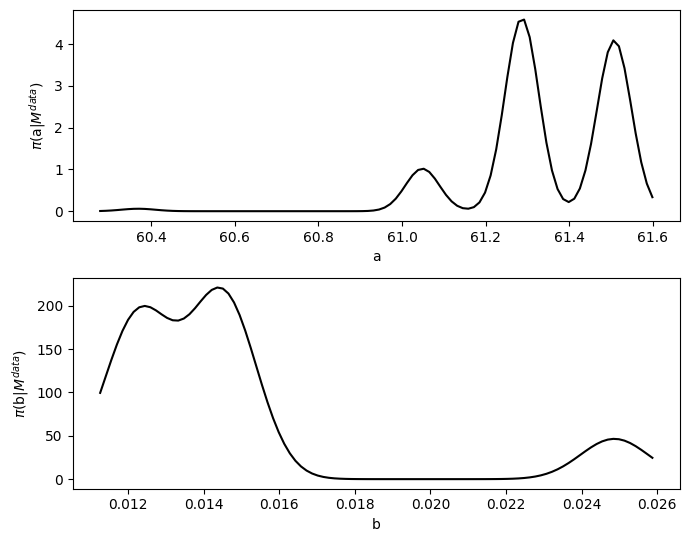

In [116]:
# Plot posterior probability density of parameters
figdp = mcpl.plot_density_panel(chain[burnin:,:], names, figsizeinches=(7,6))